# import the content

In [1]:
# import kbase
import os
local_cobrakbase_path = 'C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\Internships\\Agronne\\cobrakbase'
os.environ["HOME"] = local_cobrakbase_path
import cobrakbase
token = 'H6SZTTVQGYLKE55YLU5AOZ24OJWLKZNW'
kbase = cobrakbase.KBaseAPI(token)

# import cFBA
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
%matplotlib inline

cobrakbase 0.2.8


# Electrosynth

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Making biomass drain: cpd11416_c3
Maximize
1.0*DM_cpd11416_c1 - 1.0*DM_cpd11416_c1_reverse_1b49e
species 1 drain-flux objective value: 38.92325840957216
Maximize
1.0*DM_cpd11416_c2 - 1.0*DM_cpd11416_c2_reverse_3f8a4
species 2 drain-flux objective value: 52.19759225345213
Maximize
1.0*DM_cpd11416_c3 - 1.0*DM_cpd11416_c3_reverse_cc4cd
species 3 drain-flux objective value: 58.1600471592542
Maximize
1.0*bio1 - 1.0*bio1_reverse_b18f7


Objective
1.0 bio1 = 3.766216581357336

Uptake
------
 Metabolite       Reaction    Flux  C-Number C-Flux
cpd00013_e0 EX_cpd00013_e0   33.31         0  0.00%
cpd00030_e0 EX_cpd00030_e0 0.01608         0  0.00%
cpd00034_e0 EX_cpd00034_e0 0.01608         0  0.00%
cpd00048_e0 EX_cpd00048_e0  0.8386         0  0.00%
cpd00058_e0 EX_cpd00058_e0 0.01608         0  0.00%
cpd00063_e0 EX_cpd00063_e0 0.01608         0  0.00%
cpd00099_e0 EX_cpd00099_e0 0.01608         0  0.00%
cpd00149_e0 EX_cpd00149_e0 

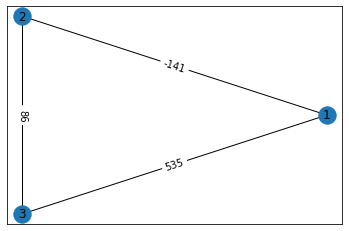

In [2]:
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['electrosynth_comnty.mdl.gf.2021',93204]
mediaInfo_2 = ["CO2_minimal",93204]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes()
cfba.constrain(media)
cfba.gapfill(media)
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

# Zahmeeth model

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Maximize
1.0*DM_cpd11416_c1 - 1.0*DM_cpd11416_c1_reverse_1b49e
species 1 drain-flux objective value: 75.52804108181631
Maximize
1.0*DM_cpd11416_c2 - 1.0*DM_cpd11416_c2_reverse_3f8a4
species 2 drain-flux objective value: 86.91587102429727
Maximize
1.0*bio1 - 1.0*bio1_reverse_b18f7


Objective
1.0 bio1 = 0.17375024029002126

Uptake
------
 Metabolite         Reaction      Flux  C-Number C-Flux
cpd00009_e0   EX_cpd00009_e0    0.2375         0  0.00%
cpd00013_e0   EX_cpd00013_e0     1.933         0  0.00%
cpd00027_e0   EX_cpd00027_e0         5         6 99.86%
cpd00028_e0   EX_cpd00028_e0 0.0004055        34  0.05%
cpd00030_e0   EX_cpd00030_e0 0.0004656         0  0.00%
cpd00034_e0   EX_cpd00034_e0 0.0004352         0  0.00%
cpd00048_e0   EX_cpd00048_e0 0.0003769         0  0.00%
cpd00058_e0   EX_cpd00058_e0 6.159E-05         0  0.00%
cpd00063_e0   EX_cpd00063_e0 0.0008577         0  0.00%
cpd00098_e0   EX_cpd00098_e0 0.00

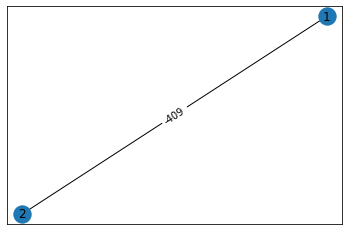

In [3]:
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
# import the model
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ["CMM_iAH991V2_iML1515.kb",40576]
mediaInfo_2 = ["Btheta_Ecoli_minimal_media",40576]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes()
cfba.constrain(media)
cfba.gapfill(media)
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

# Sans media

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Maximize
1.0*DM_cpd11416_c1 - 1.0*DM_cpd11416_c1_reverse_1b49e
species 1 drain-flux objective value: 59.70847756317541
Maximize
1.0*DM_cpd11416_c2 - 1.0*DM_cpd11416_c2_reverse_3f8a4
species 2 drain-flux objective value: 100.0
Maximize
1.0*bio1 - 1.0*bio1_reverse_b18f7


Objective
1.0 bio1 = 74.44111934095864

Uptake
------
 Metabolite       Reaction   Flux  C-Number C-Flux
cpd00007_e0 EX_cpd00007_e0    100         0  0.00%
cpd00017_e0 EX_cpd00017_e0    100        15  5.75%
cpd00024_e0 EX_cpd00024_e0    100         5  1.92%
cpd00027_e0 EX_cpd00027_e0    100         6  2.30%
cpd00028_e0 EX_cpd00028_e0 0.2089        34  0.03%
cpd00030_e0 EX_cpd00030_e0 0.2089         0  0.00%
cpd00032_e0 EX_cpd00032_e0    100         4  1.53%
cpd00033_e0 EX_cpd00033_e0  48.85         2  0.37%
cpd00034_e0 EX_cpd00034_e0 0.2089         0  0.00%
cpd00039_e0 EX_cpd00039_e0  21.25         6  0.49%
cpd00048_e0 EX_cpd00048_e0 0.2089         0  0

,fluxes,reduced_costs
rxn02342_c1,0.000000,-1.763179e-02
rxn08734_c1,0.000000,-1.110223e-16
rxn00199_c1,0.000000,-1.734723e-18
rxn10126_c1,0.000000,0.000000e+00
rxn05040_c1,0.000000,0.000000e+00
...,...,...
EX_cpd00136_e0,-0.104447,0.000000e+00
EX_cpd00030_e0,-0.208894,0.000000e+00
SK_cpd11416_c0,74.441119,0.000000e+00
DM_cpd11416_c1,0.000000,-2.678125e+00


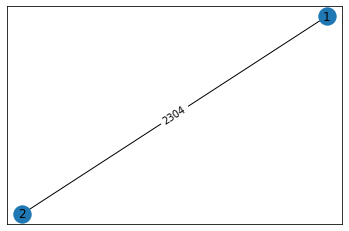

In [4]:
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
from optlang.symbolics import Zero

# from modelseedpy.fbapkg import kbasemediapkg
modelInfo_2 = ['Cjaponicus_Ecoli_Community',97055]
# if 'DM_cpd11416_c1' in [reaction.id for reaction in model.reactions]:
#     print(True)
# else:
#     print(False)
mediaInfo_2 = ["GlucoseM9Media",97055]
model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
# cfba.community_fba(model,media,summary = True)
cfba.drain_fluxes()
cfba.constrain()
cfba.gapfill()
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

display(model.optimize())

## Removed functions

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Maximize
1.0*DM_cpd11416_c1 - 1.0*DM_cpd11416_c1_reverse_1b49e
species 1 drain-flux objective value: 59.70847756317541
Maximize
1.0*DM_cpd11416_c2 - 1.0*DM_cpd11416_c2_reverse_3f8a4
species 2 drain-flux objective value: 100.0
Maximize
1.0*bio1 - 1.0*bio1_reverse_b18f7


Objective
1.0 bio1 = 74.44111934095864

Uptake
------
 Metabolite       Reaction   Flux  C-Number C-Flux
cpd00007_e0 EX_cpd00007_e0    100         0  0.00%
cpd00017_e0 EX_cpd00017_e0    100        15  5.75%
cpd00024_e0 EX_cpd00024_e0    100         5  1.92%
cpd00027_e0 EX_cpd00027_e0    100         6  2.30%
cpd00028_e0 EX_cpd00028_e0 0.2089        34  0.03%
cpd00030_e0 EX_cpd00030_e0 0.2089         0  0.00%
cpd00032_e0 EX_cpd00032_e0    100         4  1.53%
cpd00033_e0 EX_cpd00033_e0  48.85         2  0.37%
cpd00034_e0 EX_cpd00034_e0 0.2089         0  0.00%
cpd00039_e0 EX_cpd00039_e0  21.25         6  0.49%
cpd00048_e0 EX_cpd00048_e0 0.2089         0  0

,fluxes,reduced_costs
rxn02342_c1,0.000000,-1.763179e-02
rxn08734_c1,0.000000,-1.110223e-16
rxn00199_c1,0.000000,-1.734723e-18
rxn10126_c1,0.000000,0.000000e+00
rxn05040_c1,0.000000,0.000000e+00
...,...,...
EX_cpd00136_e0,-0.104447,0.000000e+00
EX_cpd00030_e0,-0.208894,0.000000e+00
SK_cpd11416_c0,74.441119,0.000000e+00
DM_cpd11416_c1,0.000000,-2.678125e+00


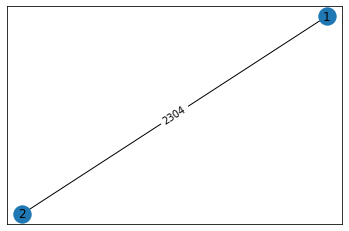

In [15]:
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
from optlang.symbolics import Zero

# from modelseedpy.fbapkg import kbasemediapkg
modelInfo_2 = ['Cjaponicus_Ecoli_Community',97055]
# if 'DM_cpd11416_c1' in [reaction.id for reaction in model.reactions]:
#     print(True)
# else:
#     print(False)
mediaInfo_2 = ["GlucoseM9Media",97055]
model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
# cfba.community_fba(model,media,summary = True)
cfba.drain_fluxes()
cfba.constrain()
cfba.gapfill()
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

display(model.optimize())

# community model 

### glucose media

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Maximize
1.0*DM_cpd11416_c1 - 1.0*DM_cpd11416_c1_reverse_1b49e
species 1 drain-flux objective value: 59.70847756317541
Maximize
1.0*DM_cpd11416_c2 - 1.0*DM_cpd11416_c2_reverse_3f8a4
species 2 drain-flux objective value: 100.0


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
modelseedpy.core.msgapfill - WARNING - No solution found for <cobrakbase.core.kbasebiochem.media.Media object at 0x000001F57AE14C08>



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.

Maximize
1.0*bio1 - 1.0*bio1_reverse_b18f7


Objective
1.0 bio1 = 119.41581179507443

Uptake
------
 Metabolite       Reaction   Flux  C-Number C-Flux
cpd00007_e0 EX_cpd00007_e0   1000         0  0.00%
cpd00017_e0 EX_cpd00017_e0   1000        15 47.08%
cpd00023_e0 EX_cpd00023_e0  462.4         5  7.26%
cpd00024_e0 EX_cpd00024_e0  5.228         5  0.08%
cpd00027_e0 EX_cpd00027_e0   1000         6 18.83%
cpd00028_e0 EX_cpd00028_e0 0.3351        34  0.04%
cpd00030_e0 EX_cpd00030_e0 0.3351         0  0.00%
cpd00033_e0 EX_cpd00033_e0  36.08         2  0.23%
cpd00034_e0 EX_cpd00034_e0 0.3351         0  0.00%
cpd00039_e0 EX_cpd00039_e0  34.09         6  0.64%
cpd00042_e0 EX_cpd00042_e0  5.049        10  0.16%
cpd00048_e0 EX_cpd00048_e0 0.3351         0  0.00%
cpd00051_e0 EX_cpd00051_e0  29.46         6  0.55%
cpd00053_e0 EX_cpd00053_e0  74.88         5  1.18%
cpd00054_e0 EX_cpd00054_e0  61.91         3  0.58%
cpd00058_e0 E

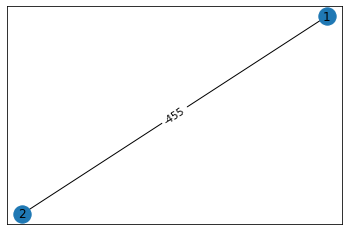

In [6]:
# import the model
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['Cjaponicus_Ecoli_Community',97055]
mediaInfo_2 = ["GlucoseM9Media",97055]
model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes()
cfba.gapfill(media)
cfba.constrain(media)

# operational sections
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

### chitin media

Making biomass drain: cpd11416_c1
Making biomass drain: cpd11416_c2
Maximize
1.0*DM_cpd11416_c1 - 1.0*DM_cpd11416_c1_reverse_1b49e
species 1 drain-flux objective value: 59.70847756317541
Maximize
1.0*DM_cpd11416_c2 - 1.0*DM_cpd11416_c2_reverse_3f8a4
species 2 drain-flux objective value: 100.0
Maximize
1.0*bio1 - 1.0*bio1_reverse_b18f7


Objective
1.0 bio1 = 0.0

Uptake
------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []

Secretion
---------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []



C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
modelseedpy.core.msgapfill - WARNING - No solution found for <cobrakbase.core.kbasebiochem.media.Media object at 0x000001F59535D688>



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.

Maximize
1.0*bio1 - 1.0*bio1_reverse_b18f7


Objective
1.0 bio1 = 0.0

Uptake
------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []

Secretion
---------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []


Production matrix:
         1    2
Donor          
1      0.0  0.0
2      0.0  0.0


Consumption matrix:
            1    2
Receiver          
1         0.0  0.0
2         0.0  0.0


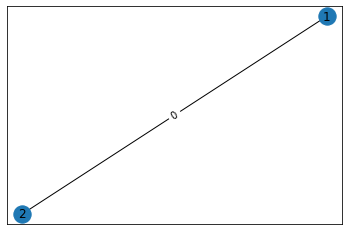

In [7]:
# import the model
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
# from modelseedpy.fbapkg import kbasemediapkg

modelInfo_2 = ['Cjaponicus_Ecoli_Community',97055]
mediaInfo_2 = ["ChitinM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes()
cfba.constrain(media) 
solution = cfba.run(summary = True)
cfba.gapfill(media)
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

# individual models

### Pure individual models

In [8]:
modelInfo = ['Cjaponicus_gF4b_Model',97055]
model = kbase.get_from_ws(modelInfo[0],modelInfo[1])
print('Cjap')
solution = model.optimize()
print(solution.objective_value)
# display(model.summary())

modelInfo_2 = ['Ecoli_gF4_Model',97055]
model_2 = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
print('Ecoli')
solution_2 = model_2.optimize()
print(solution_2.objective_value)
# display(model_2.summary())

Cjap
59.70847756317551
Ecoli
183.21977139046754


## Cjaponicus

### Glucose media

Maximize
1.0*bio1 - 1.0*bio1_reverse_b18f7


Objective
1.0 bio1 = 59.70847756317551

Uptake
------
 Metabolite       Reaction   Flux  C-Number C-Flux
cpd00007_e0 EX_cpd00007_e0   1000         0  0.00%
cpd00009_e0 EX_cpd00009_e0  48.52         0  0.00%
cpd00017_e0 EX_cpd00017_e0   1000        15 59.61%
cpd00027_e0 EX_cpd00027_e0   1000         6 23.85%
cpd00028_e0 EX_cpd00028_e0 0.1676        34  0.02%
cpd00030_e0 EX_cpd00030_e0 0.1676         0  0.00%
cpd00033_e0 EX_cpd00033_e0  11.86         2  0.09%
cpd00034_e0 EX_cpd00034_e0 0.1676         0  0.00%
cpd00039_e0 EX_cpd00039_e0  17.04         6  0.41%
cpd00048_e0 EX_cpd00048_e0 0.1676         0  0.00%
cpd00051_e0 EX_cpd00051_e0  14.73         6  0.35%
cpd00053_e0 EX_cpd00053_e0  518.2         5 10.30%
cpd00054_e0 EX_cpd00054_e0  47.99         3  0.57%
cpd00058_e0 EX_cpd00058_e0 0.1676         0  0.00%
cpd00063_e0 EX_cpd00063_e0 0.1676         0  0.00%
cpd00065_e0 EX_cpd00065_e0  2.818        11  0.12%
cpd00066_e0 EX_cpd00066_e0  9.226 

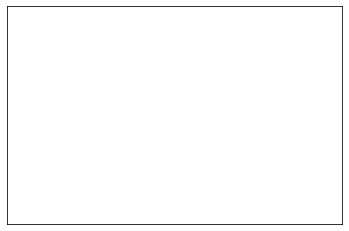

In [9]:
# import the model
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
modelInfo_2 = ['Cjaponicus_gF4b_Model',97055]
mediaInfo_2 = ["GlucoseM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes()
cfba.gapfill(media)
cfba.constrain(media)
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

### Chitin media

Maximize
1.0*bio1 - 1.0*bio1_reverse_b18f7


Objective
1.0 bio1 = 59.70847756317551

Uptake
------
 Metabolite       Reaction   Flux  C-Number C-Flux
cpd00007_e0 EX_cpd00007_e0   1000         0  0.00%
cpd00009_e0 EX_cpd00009_e0  48.52         0  0.00%
cpd00017_e0 EX_cpd00017_e0   1000        15 59.61%
cpd00027_e0 EX_cpd00027_e0   1000         6 23.85%
cpd00028_e0 EX_cpd00028_e0 0.1676        34  0.02%
cpd00030_e0 EX_cpd00030_e0 0.1676         0  0.00%
cpd00033_e0 EX_cpd00033_e0  11.86         2  0.09%
cpd00034_e0 EX_cpd00034_e0 0.1676         0  0.00%
cpd00039_e0 EX_cpd00039_e0  17.04         6  0.41%
cpd00048_e0 EX_cpd00048_e0 0.1676         0  0.00%
cpd00051_e0 EX_cpd00051_e0  14.73         6  0.35%
cpd00053_e0 EX_cpd00053_e0  518.2         5 10.30%
cpd00054_e0 EX_cpd00054_e0  47.99         3  0.57%
cpd00058_e0 EX_cpd00058_e0 0.1676         0  0.00%
cpd00063_e0 EX_cpd00063_e0 0.1676         0  0.00%
cpd00065_e0 EX_cpd00065_e0  2.818        11  0.12%
cpd00066_e0 EX_cpd00066_e0  9.226 

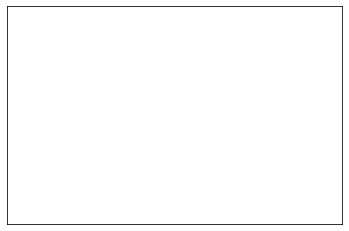

In [10]:
# import the model
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
modelInfo_2 = ['Cjaponicus_gF4b_Model',97055]
mediaInfo_2 = ["ChitinM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes()
cfba.gapfill(media)
cfba.constrain(media)
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

## E coli

### Glucose media

Metabolite,Reaction,Flux,C-Number,C-Flux
cpd00001_e0,EX_cpd00001_e0,572.4,0,0.00%
cpd00007_e0,EX_cpd00007_e0,1.671,0,0.00%
cpd00017_e0,EX_cpd00017_e0,3.599,15,0.14%
cpd00024_e0,EX_cpd00024_e0,128.9,5,1.67%
cpd00028_e0,EX_cpd00028_e0,0.5141,34,0.05%
cpd00030_e0,EX_cpd00030_e0,0.5141,0,0.00%
cpd00032_e0,EX_cpd00032_e0,923.4,4,9.55%
cpd00033_e0,EX_cpd00033_e0,86.93,2,0.45%
cpd00034_e0,EX_cpd00034_e0,0.5141,0,0.00%
cpd00039_e0,EX_cpd00039_e0,52.3,6,0.81%


Maximize
1.0*bio1 - 1.0*bio1_reverse_b18f7


Objective
1.0 bio1 = 183.21977139046757

Uptake
------
 Metabolite       Reaction   Flux  C-Number C-Flux
cpd00001_e0 EX_cpd00001_e0  572.4         0  0.00%
cpd00007_e0 EX_cpd00007_e0  1.671         0  0.00%
cpd00017_e0 EX_cpd00017_e0  3.599        15  0.14%
cpd00024_e0 EX_cpd00024_e0  128.9         5  1.67%
cpd00028_e0 EX_cpd00028_e0 0.5141        34  0.05%
cpd00030_e0 EX_cpd00030_e0 0.5141         0  0.00%
cpd00032_e0 EX_cpd00032_e0  923.4         4  9.55%
cpd00033_e0 EX_cpd00033_e0  86.93         2  0.45%
cpd00034_e0 EX_cpd00034_e0 0.5141         0  0.00%
cpd00039_e0 EX_cpd00039_e0   52.3         6  0.81%
cpd00048_e0 EX_cpd00048_e0 0.5141         0  0.00%
cpd00051_e0 EX_cpd00051_e0   45.2         6  0.70%
cpd00054_e0 EX_cpd00054_e0  45.59         3  0.35%
cpd00058_e0 EX_cpd00058_e0 0.5141         0  0.00%
cpd00060_e0 EX_cpd00060_e0  20.33         5  0.26%
cpd00063_e0 EX_cpd00063_e0 0.5141         0  0.00%
cpd00065_e0 EX_cpd00065_e0  8.648

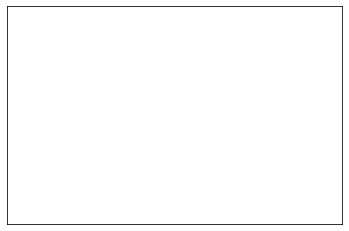

In [11]:
# import the model
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
modelInfo_2 = ['Ecoli_gF4_Model',97055]
mediaInfo_2 = ["GlucoseM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model

display(model.summary())
cfba = MSCommunity(model)
cfba.drain_fluxes()
cfba.gapfill(media)
cfba.constrain(media)
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

### Chitin media

C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
modelseedpy.core.msgapfill - WARNING - No solution found for <cobrakbase.core.kbasebiochem.media.Media object at 0x000001F5A7D91688>



--> ERROR: The simulation lacks a solution, and cannot be gapfilled.

Maximize
1.0*bio1 - 1.0*bio1_reverse_b18f7


Objective
1.0 bio1 = 183.21977139046754

Uptake
------
 Metabolite       Reaction   Flux  C-Number C-Flux
cpd00001_e0 EX_cpd00001_e0  572.4         0  0.00%
cpd00007_e0 EX_cpd00007_e0  1.671         0  0.00%
cpd00017_e0 EX_cpd00017_e0  3.599        15  0.14%
cpd00024_e0 EX_cpd00024_e0  128.9         5  1.67%
cpd00028_e0 EX_cpd00028_e0 0.5141        34  0.05%
cpd00030_e0 EX_cpd00030_e0 0.5141         0  0.00%
cpd00032_e0 EX_cpd00032_e0  923.4         4  9.55%
cpd00033_e0 EX_cpd00033_e0  86.93         2  0.45%
cpd00034_e0 EX_cpd00034_e0 0.5141         0  0.00%
cpd00039_e0 EX_cpd00039_e0   52.3         6  0.81%
cpd00048_e0 EX_cpd00048_e0 0.5141         0  0.00%
cpd00051_e0 EX_cpd00051_e0   45.2         6  0.70%
cpd00054_e0 EX_cpd00054_e0  45.59         3  0.35%
cpd00058_e0 EX_cpd00058_e0 0.5141         0  0.00%
cpd00060_e0 EX_cpd00060_e0  20.33         5  0.26%
cpd00063_e0 E

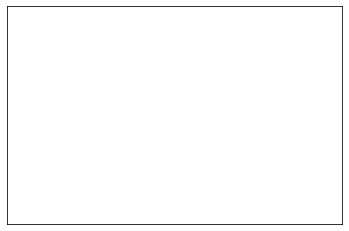

In [12]:
# import the model
%run ../../TFA/ModelSEEDpy/modelseedpy/core/mscommunity.py
modelInfo_2 = ['Ecoli_gF4_Model',97055]
mediaInfo_2 = ["ChitinM9Media",97055]

model = kbase.get_from_ws(modelInfo_2[0],modelInfo_2[1])
media = kbase.get_from_ws(mediaInfo_2[0],mediaInfo_2[1])
# kmp = kbasemediapkg.KBaseMediaPkg(self.model)
# kmp.build_package(media)

# simulate and visualize the model
cfba = MSCommunity(model)
cfba.drain_fluxes()
cfba.gapfill(media)
cfba.constrain(media)
solution = cfba.run(summary = True)
cfba.compute_interactions(solution)
cfba.visualize()

# Brainstorming

In [13]:
string = 'ex_asdf'
print(string[:3])

ex_


In [14]:
via_string = []
for reaction in model.reactions:
    if reaction.id[:3] == 'EX_':
        via_string.append(reaction.id)

via_attribute = []
for reaction in model.exchanges:
    if reaction.id[:3] == 'EX_':
        via_attribute.append(reaction.id)
    
print(set(via_attribute) -  set(via_string))
print(set(via_string) == set(via_attribute))

set()
True
